In [1]:
#For numerics
import numpy as np

#For loading and saving data
import pandas as pd

#For plotting
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

#For TeX plots
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

#For colorblind plots
import seaborn
colors = list(seaborn.color_palette('colorblind').as_hex())

#
import itertools

#For setting root path and accessing files
import sys
import os
root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if root not in sys.path:
    sys.path.append(root)
os.chdir('..') 
import h5py

#for caching cross-section values
from functools import lru_cache

from lepton_nucleus_collisions.limits import EIC_limit, MuSIC_limit, MuBeD_limit
from lfv_lepton_observables.limits import magnetic_dipole_moment_limit, g_2_explanation, trilepton_decay_limit, radiative_decay_limit
from phys.constants import me, mm, mt

## Constraints on $g_{e\tau}$ from the EIC and LFV Lepton Decays

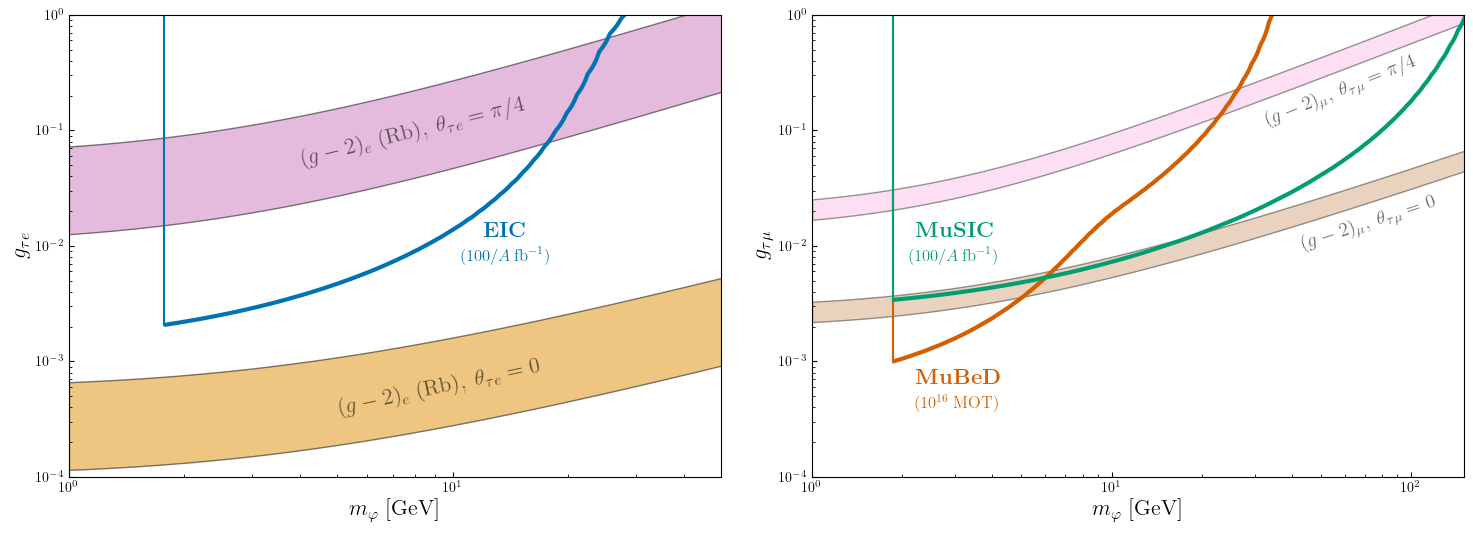

In [24]:
masses = np.linspace(1e0, 1e2, 1000)

fig = plt.figure(figsize = (18, 6))
gs = GridSpec(1, 2, wspace = 0.14)

ax1 = fig.add_subplot(gs[0])

g = [[0, 0, 1],
     [0, 0, 0],
     [1, 0, 0]]
ALP = False

plt.plot(masses, 
         EIC_limit(masses, g = g, tau_efficiency = 0.01, ALP = ALP),
         color = colors[0],
         linewidth = 3)

plt.axvline(mt + me,
            ymin = 0.328,
           color = colors[0])


plt.fill_between(masses,
                 *g_2_explanation(masses, 'e Rb', (0, 2), g = g, ALP = ALP, mode = 'PC'),
                 color = colors[1],
                 alpha = 0.5,
                 edgecolor = 'black')

plt.fill_between(masses, 
                 *g_2_explanation(masses, 'e Rb', (0, 2), g = g, ALP = ALP, mode = 'chiral'),
                 color = colors[4],
                 alpha = 0.5,
                 edgecolor = 'black')


plt.tick_params(which = 'both', direction = 'in')
plt.text(12, 1.2e-2, '${\\bf EIC}$', fontsize = 16, color = colors[0])
plt.text(10.5, 7.4e-3, '$(100/A~{\\rm fb}^{-1})$', fontsize = 12, color = colors[0])

plt.text(4, 5e-2, '${(g-2)_e~({\\rm Rb})},~\\theta_{\\tau e} = \\pi/4$',
         rotation = 14, fontsize = 16, alpha = 0.6)

plt.text(5, 3.5e-4, '${(g-2)_e~({\\rm Rb})},~\\theta_{\\tau e} = 0$',
         rotation = 12, fontsize = 16, alpha = 0.6)

plt.xlabel('$m_\\varphi~[{\\rm GeV}]$', fontsize = 16)
plt.ylabel('$g_{\\tau e}$', fontsize = 16)

plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-4, 1e0)
plt.xlim(1e0, 50)

ax2 = fig.add_subplot(gs[1])

g = [[0, 0, 0],
     [0, 0, 1],
     [0, 1, 0]]
ALP = False

masses = np.geomspace(1e0, 2e2, 1000)

plt.plot(masses, 
         MuBeD_limit(masses,
                     g = g, 
                     tau_efficiency = 0.15,
                     ALP = ALP),
         color = colors[3],
         linewidth = 3)

plt.plot(masses, 
         MuSIC_limit(masses,
                     g = g, 
                     tau_efficiency = 0.01, 
                     ALP = ALP),
         color = colors[2],
         linewidth = 3)

plt.axvline(0.99*(mt + mm), ymin = 0.25, color = colors[3])
plt.axvline(0.99*(mt + mm), ymin = 0.383, color = colors[2])

plt.fill_between(masses,
                 *g_2_explanation(masses, 'mu', (0, 2), g = g, ALP = ALP, mode = 'PC'),
                 color = colors[5],
                 alpha = 0.4,
                 edgecolor = 'black')

plt.fill_between(masses, 
                 *g_2_explanation(masses, 'mu', (0, 2), g = g, ALP = ALP, mode = 'chiral'),
                 color = colors[6],
                 alpha = 0.4,
                 edgecolor = 'black')

plt.tick_params(which = 'both', direction = 'in')
plt.text(2.2, 1.2e-2, '${\\bf MuSIC}$', fontsize = 16, color = colors[2])
plt.text(2.1, 7.5e-3, '$(100/A~{\\rm fb}^{-1})$', fontsize = 12, color = colors[2])

plt.text(2.2, 6.4e-4, '${\\bf MuBeD}$', fontsize = 16, color = colors[3])
plt.text(2.2, 4e-4, '$(10^{16}~{\\rm MOT})$', fontsize = 12, color = colors[3])

plt.text(32, 1.1e-1, '$(g-2)_{\\mu},~\\theta_{\\tau \\mu} = \\pi/4$',
         rotation = 22, fontsize = 14, alpha = 0.6)

plt.text(42, 9.3e-3, '$(g-2)_{\\mu},~\\theta_{\\tau \\mu} = 0$',
         rotation = 18, fontsize = 14, alpha = 0.6)

plt.xlabel('$m_\\varphi~[{\\rm GeV}]$', fontsize = 16)
plt.ylabel('$g_{\\tau \\mu}$', fontsize = 16)

plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-4, 1e0)
plt.xlim(1e0, 150)

plt.savefig('figures/chapter4/lfv_scalar_limits_and_g_2.pdf', format = 'pdf')

In [25]:
from skimage import measure

def find_contours(x, y, Z, Z_val = 1):
    contours = measure.find_contours(Z, Z_val)

    boundary_pts = []
    for cont in contours:
        i, j = cont.T[0], cont.T[1]  # Extract row/col indices
        x_coords = np.interp(i, np.arange(len(x)), x)  # Map cols to x
        y_coords = np.interp(j, np.arange(len(y)), y)  # Map rows to y
        boundary_pts.append(np.column_stack((x_coords, y_coords)).T)
    
    return boundary_pts

In [26]:
g = [[0, 0, 0],
     [0, 0, 1], 
     [0, 1, 0]]
theta = np.linspace(0, np.pi/4, 10000)
theta_mat = theta.reshape(1, 1, 1, -1) * np.ones((3, 3, 1, 1))

masses = np.geomspace(2, 200, 1000)

g_mu_explanation = g_2_explanation(masses.reshape(-1, 1), 'mu', (1, 2), g = g, th = theta_mat)
g_mu_avg = np.mean(g_mu_explanation, axis = 0)

gmt_MuSIC = MuSIC_limit(masses.reshape(-1, 1), g = g, tau_efficiency = 0.01, ALP = ALP)
gmt_MuBeD = MuBeD_limit(masses.reshape(-1, 1), g = g, tau_efficiency = 0.15, ALP = ALP) #simulate drop-off at m_tau for now


/Volumes/T7/Research/Thesis/lfv_lepton_observables/formulae/form_factor_functions_approx.py:251: RuntimeWarning: divide by zero encountered in divide
  u = np.complex128([_ml/m for _ml in ml])
/Volumes/T7/Research/Thesis/lfv_lepton_observables/formulae/form_factor_functions_approx.py:251: RuntimeWarning: invalid value encountered in divide
  u = np.complex128([_ml/m for _ml in ml])
/Volumes/T7/Research/Thesis/lfv_lepton_observables/formulae/form_factor_functions_approx.py:255: RuntimeWarning: divide by zero encountered in divide
  u = np.complex128([_ml/m for _ml in ml])
/Volumes/T7/Research/Thesis/lfv_lepton_observables/formulae/form_factor_functions_approx.py:255: RuntimeWarning: invalid value encountered in divide
  u = np.complex128([_ml/m for _ml in ml])
/Volumes/T7/Research/Thesis/lfv_lepton_observables/limits.py:160: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((anomaly + nsig * sig)/ da), np.sqrt((anomaly - nsig * sig)/ da)
/Volumes/T7/Research/Thesis/lfv_

(1.0, 200.0)

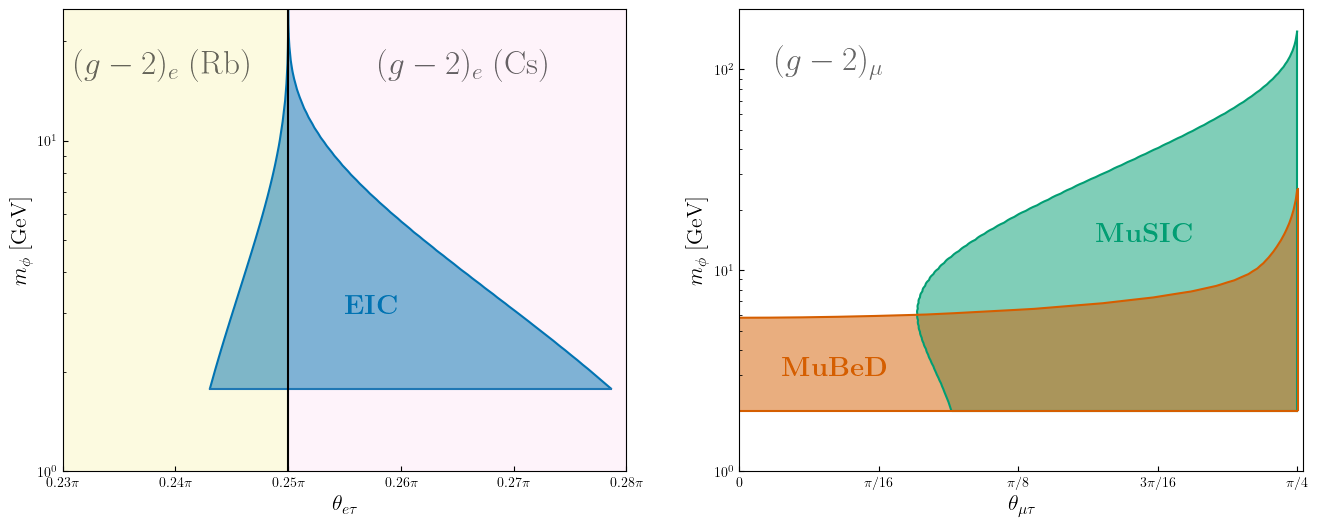

In [34]:
fig = plt.figure(figsize = (16, 6))
gs = GridSpec(1, 2, wspace = 0.2)

ax1 = fig.add_subplot(gs[0])

g = [[0, 0, 1],
     [0, 0, 0], 
     [1, 0, 0]]

ALP = False

theta = np.linspace(0.6, 1, 10000)
theta_mat = theta.reshape(1, 1, 1, -1) * np.ones((3, 3, 1, 1))

masses = np.linspace(0, 25, 1000)
Cs_explanation = g_2_explanation(masses.reshape(-1, 1), 'e Cs', (2, 0), g = g, th = theta_mat, ALP = ALP)
Cs_avg = np.mean(Cs_explanation, axis = 0)

Rb_explanation = g_2_explanation(masses.reshape(-1, 1), 'e Rb', (2, 0), g = g, th = theta_mat, ALP = ALP)
Rb_avg = np.mean(Rb_explanation, axis = 0)
get_EIC = EIC_limit(masses, g = g, tau_efficiency = 0.01, ALP = ALP).reshape(-1, 1)

#We want those values of m and theta for which g_explanation > g_EIC_lim

Cs_line = find_contours(masses, theta, (Cs_avg - get_EIC), 0)[0]
Rb_line = find_contours(masses, theta, (Rb_avg - get_EIC), 0)[0]

plt.fill_betweenx(masses, 0.23*np.pi, np.pi/4, color = colors[8], alpha = 0.15)
plt.fill_betweenx(masses, np.pi/4, 0.28*np.pi, color = colors[6], alpha = 0.15)

plt.fill_betweenx(*Cs_line, np.pi/4, color = colors[0], alpha = 0.5, edgecolor = None)
plt.fill_betweenx(*Rb_line, np.pi/4, color = colors[0], alpha = 0.5, edgecolor = None)

plt.plot(*Cs_line[::-1], color = colors[0])
plt.plot(*Rb_line[::-1], color = colors[0])

plt.text(0.231*np.pi, 16, '$(g-2)_{e}~({\\rm Rb})$', fontsize = 24, alpha = 0.6)
plt.text(0.258*np.pi, 16, '$(g-2)_{e}~({\\rm Cs})$', fontsize = 24, alpha = 0.6)

plt.plot([Cs_line[1][Cs_line[0].argmin()], Rb_line[1][Rb_line[0].argmin()]], [1.77, 1.77])

plt.axvline(np.pi/4, color = 'black')
xticks = np.round(np.arange(0.23, 0.28, 0.01), 3)
plt.xticks(xticks*np.pi, [f'${tick}\\pi$' for tick in xticks])
plt.tick_params(which = 'both', direction = 'in')

plt.text(0.255*np.pi, 3, '${\\bf EIC}$', color = colors[0], fontsize = 20)

plt.ylabel('$m_\\phi~[{\\rm GeV}]$', fontsize = 16)
plt.xlabel('$\\theta_{e\\tau}$', fontsize = 16)

plt.yscale('log')
plt.ylim(1, 25)
plt.xlim(0.23*np.pi, 0.28*np.pi)


ax2 = fig.add_subplot(gs[1])

g = [[0, 0, 0],
     [0, 0, 1], 
     [0, 1, 0]]
ALP = False

theta = np.linspace(0, np.pi/4, 10000)
theta_mat = theta.reshape(1, 1, 1, -1) * np.ones((3, 3, 1, 1))

masses = np.geomspace(2, 200, 1000)

g_mu_explanation = g_2_explanation(masses.reshape(-1, 1), 'mu', (1, 2), g = g, th = theta_mat)
g_mu_avg = np.mean(g_mu_explanation, axis = 0)

gmt_MuSIC = MuSIC_limit(masses, g = g, tau_efficiency = 0.01, ALP = ALP).reshape(-1, 1)
gmt_MuBeD = MuBeD_limit(masses, g = g, tau_efficiency = 0.15, ALP = ALP).reshape(-1, 1)

MuSIC_line = find_contours(masses, theta, (g_mu_avg - gmt_MuSIC), 0)[0]
MuBeD_line = find_contours(masses, theta, (g_mu_avg - gmt_MuBeD), 0)[0]

ax2.plot([1], [2])

plt.fill_betweenx(*MuSIC_line, np.pi/4, color = colors[2], alpha = 0.5, edgecolor = None)
plt.plot(*MuSIC_line[::-1], color = colors[2])
plt.axhline(1.99, 0.38, 0.99, color = colors[2])
plt.axvline(np.pi/4, 0.13, 0.95, color = colors[2])


plt.fill_between(*MuBeD_line[::-1], 2, color = colors[3], alpha = 0.5, edgecolor = None)
plt.plot(*MuBeD_line[::-1], color = colors[3])
plt.axhline(2, 0, 0.99, color = colors[3])
plt.axvline(1.001*np.pi/4, 0.132, 0.61, color = colors[3])

plt.text(0.05, 100, '$(g-2)_{\\mu}$', fontsize = 24, alpha = 0.6)

plt.text(0.16*np.pi, 14, '${\\bf MuSIC}$', color = colors[2], fontsize = 20)
plt.text(0.06, 3, '${\\bf MuBeD}$', color = colors[3], fontsize = 20)

plt.xticks([0, np.pi/16, np.pi/8, 3*np.pi/16, np.pi/4], ['$0$', '$\\pi/16$', '$\\pi/8$', '$3\\pi/16$', '$\\pi/4$'])

plt.tick_params(which = 'both', direction = 'in')

plt.ylabel('$m_\\phi~[{\\rm GeV}]$', fontsize = 16)
plt.xlabel('$\\theta_{\\mu\\tau}$', fontsize = 16)

#plt.axvline(np.pi/4)
plt.yscale('log')
plt.xlim(0, 1.01*np.pi/4)
plt.ylim(1e0, 2e2)

/Volumes/T7/Research/Thesis/lfv_lepton_observables/formulae/form_factor_functions_approx.py:251: RuntimeWarning: divide by zero encountered in divide
  u = np.complex128([_ml/m for _ml in ml])
/Volumes/T7/Research/Thesis/lfv_lepton_observables/formulae/form_factor_functions_approx.py:251: RuntimeWarning: invalid value encountered in divide
  u = np.complex128([_ml/m for _ml in ml])
/Volumes/T7/Research/Thesis/lfv_lepton_observables/formulae/form_factor_functions_approx.py:255: RuntimeWarning: divide by zero encountered in divide
  u = np.complex128([_ml/m for _ml in ml])
/Volumes/T7/Research/Thesis/lfv_lepton_observables/formulae/form_factor_functions_approx.py:255: RuntimeWarning: invalid value encountered in divide
  u = np.complex128([_ml/m for _ml in ml])
/Volumes/T7/Research/Thesis/lfv_lepton_observables/limits.py:160: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((anomaly + nsig * sig)/ da), np.sqrt((anomaly - nsig * sig)/ da)
/Volumes/T7/Research/Thesis/lfv_

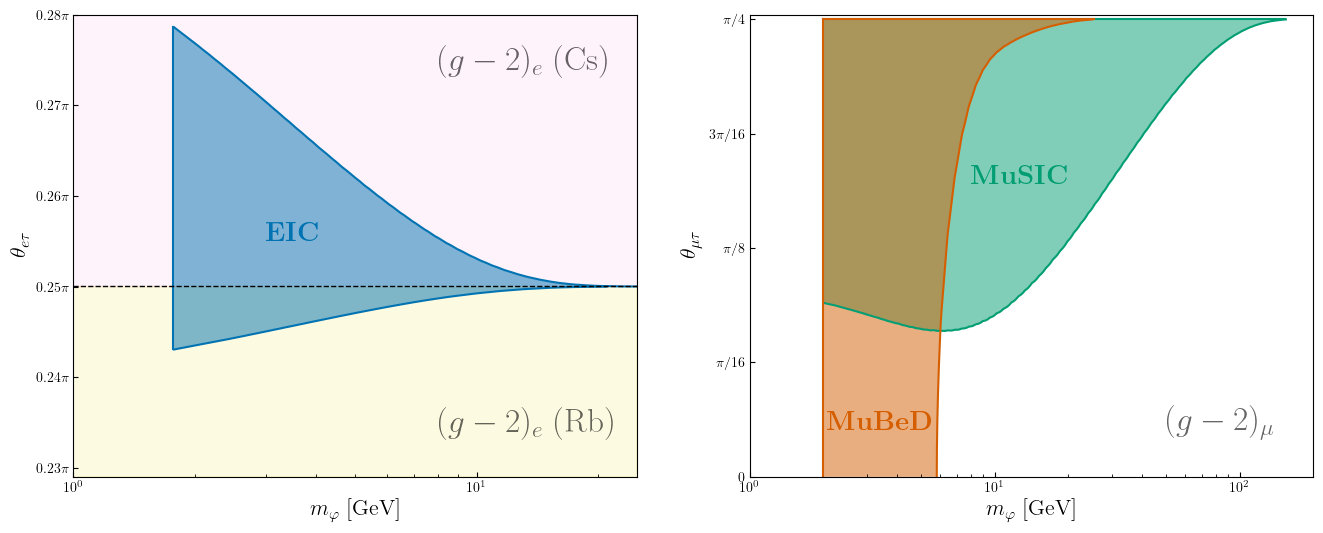

In [37]:
fig = plt.figure(figsize = (16, 6))
gs = GridSpec(1, 2, wspace = 0.2)

ax1 = fig.add_subplot(gs[0])

g = [[0, 0, 1],
     [0, 0, 0], 
     [1, 0, 0]]

ALP = False

theta = np.linspace(0.6, 1, 10000)
theta_mat = theta.reshape(1, 1, 1, -1) * np.ones((3, 3, 1, 1))

masses = np.linspace(0, 25, 1000)
Cs_explanation = g_2_explanation(masses.reshape(-1, 1), 'e Cs', (2, 0), g = g, th = theta_mat, ALP = ALP)
Cs_avg = np.mean(Cs_explanation, axis = 0)

Rb_explanation = g_2_explanation(masses.reshape(-1, 1), 'e Rb', (2, 0), g = g, th = theta_mat, ALP = ALP)
Rb_avg = np.mean(Rb_explanation, axis = 0)
get_EIC = EIC_limit(masses, g = g, tau_efficiency = 0.01, ALP = ALP).reshape(-1, 1)

#We want those values of m and theta for which g_explanation > g_EIC_lim

Cs_line = find_contours(masses, theta, (Cs_avg - get_EIC), 0)[0]
Rb_line = find_contours(masses, theta, (Rb_avg - get_EIC), 0)[0]

plt.fill_between(masses, 0.229*np.pi, np.pi/4, color = colors[8], alpha = 0.15)
plt.fill_between(masses, np.pi/4, 0.28*np.pi, color = colors[6], alpha = 0.15)

plt.fill_between(*Cs_line, np.pi/4, color = colors[0], alpha = 0.5, edgecolor = None)
plt.fill_between(*Rb_line, np.pi/4, color = colors[0], alpha = 0.5, edgecolor = None)

plt.plot(*Cs_line, color = colors[0])
plt.plot(*Rb_line, color = colors[0])

plt.plot([1.77, 1.77], [Cs_line[1][Cs_line[0].argmin()], Rb_line[1][Rb_line[0].argmin()]], color = colors[0])

plt.text(8, 0.234*np.pi, '$(g-2)_{e}~({\\rm Rb})$', fontsize = 24, alpha = 0.6)
plt.text(8, 0.274*np.pi, '$(g-2)_{e}~({\\rm Cs})$', fontsize = 24, alpha = 0.6)

plt.axhline(np.pi/4 + 0.5*me/mt, color = 'black', linestyle = 'dashed', linewidth = 1)
yticks = np.round(np.arange(0.23, 0.28, 0.01), 3)
plt.yticks(yticks*np.pi, [f'${tick}\\pi$' for tick in yticks])
plt.tick_params(which = 'both', direction = 'in')

plt.text(3, 0.255*np.pi, '${\\bf EIC}$', color = colors[0], fontsize = 20)

plt.xlabel('$m_\\varphi~[{\\rm GeV}]$', fontsize = 16)
plt.ylabel('$\\theta_{e\\tau}$', fontsize = 16)

plt.xscale('log')
plt.xlim(1, 25)
plt.ylim(0.229*np.pi, 0.28*np.pi)

ax2 = fig.add_subplot(gs[1])

g = [[0, 0, 0],
     [0, 0, 1], 
     [0, 1, 0]]
ALP = False

theta = np.linspace(0, np.pi/4, 10000)
theta_mat = theta.reshape(1, 1, 1, -1) * np.ones((3, 3, 1, 1))

masses = np.geomspace(2, 200, 1000)

g_mu_explanation = g_2_explanation(masses.reshape(-1, 1), 'mu', (1, 2), g = g, th = theta_mat)
g_mu_avg = np.mean(g_mu_explanation, axis = 0)

gmt_MuSIC = MuSIC_limit(masses, g = g, tau_efficiency = 0.01, ALP = ALP).reshape(-1, 1)
gmt_MuBeD = MuBeD_limit(masses, g = g, tau_efficiency = 0.15, ALP = ALP).reshape(-1, 1) #simulate drop-off at m_tau for now

MuSIC_line = find_contours(masses, theta, (g_mu_avg - gmt_MuSIC), 0)[0]
MuBeD_line = find_contours(masses, theta, (g_mu_avg - gmt_MuBeD), 0)[0]

plt.fill_between(*MuSIC_line, np.pi/4, color = colors[2], alpha = 0.5, edgecolor = None)
plt.plot(*MuSIC_line, color = colors[2])
plt.axhline(1.99, 0.38, 0.99, color = colors[2])
plt.axhline(np.pi/4, 0.13, 0.95, color = colors[2])


plt.fill_betweenx(*MuBeD_line[::-1], 2, color = colors[3], alpha = 0.5, edgecolor = None)
plt.plot(*MuBeD_line, color = colors[3])
plt.axvline(2, 0, 0.99, color = colors[3])
plt.axhline(1.001*np.pi/4, 0.132, 0.61, color = colors[3])

plt.text(50, 0.08, '$(g-2)_{\\mu}$', fontsize = 24, alpha = 0.6)

plt.text(8, 0.16*np.pi, '${\\bf MuSIC}$', color = colors[2], fontsize = 20)
plt.text(2.07, 0.08, '${\\bf MuBeD}$', color = colors[3], fontsize = 20)

plt.yticks([0, np.pi/16, np.pi/8, 3*np.pi/16, np.pi/4], ['$0$', '$\\pi/16$', '$\\pi/8$', '$3\\pi/16$', '$\\pi/4$'])

plt.tick_params(which = 'both', direction = 'in')

plt.xlabel('$m_\\varphi~[{\\rm GeV}]$', fontsize = 16)
plt.ylabel('$\\theta_{\\mu\\tau}$', fontsize = 16)

#plt.axvline(np.pi/4)
plt.xscale('log')
plt.ylim(0, 1.01*np.pi/4)
plt.xlim(1e0, 2e2)


plt.savefig('figures/chapter4/scalar_g_2_explanations_per_experiment.pdf', format = 'pdf')